Identitas Diri: **Wahyu Ika Sukmawati**

In [1]:
# download file

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /home/rockpaperscissors.zip

--2021-04-26 22:07:52--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/home/rockpaperscissors.zip’

/home/rockpaperscis 100%[===================>] 307.92M   850KB/s    in 3m 53s  

2021-04-26 22:11:47 (1.32 MB/s) - ‘/home/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
pip install split-folders

In [3]:
!pip3 install keras-visualizer

In [4]:
import os
import shutil
import zipfile
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
from google.colab import files
from keras.preprocessing import image
from keras_visualizer import visualizer
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [5]:
# melakukan ekstraksi pada file zip

local_zip = '/home/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/home')
zip_ref.close()

In [6]:
# hapus file yang tidak diperlukan
!rm -rf /home/split
!rm -rf /home/rockpaperscissors/rock
!rm -rf /home/rockpaperscissors/scissors
!rm -rf /home/rockpaperscissors/paper/
!rm -rf /home/__MACOSX

print("Folder terhapus")

# membuat folder split untuk menampung hasil bagi-bagi file 
new_dir = "split"
parent_dir = "/home"
path = os.path.join(parent_dir, new_dir)
os.mkdir(path)
print("Folder '% s' telah dibuat")

Folder terhapus
Folder '% s' telah dibuat


In [7]:
# membagi file png kedalam folder split train dan val

splitfolders.ratio("/home/rockpaperscissors/rps-cv-images", output="/home/split/", seed=1337, ratio=(.6, .4), group_prefix=None)


Copying files: 2188 files [00:00, 3466.16 files/s]


In [8]:
# menggunakan ImagedataGenerator untuk augmentasi gambar

# proses augmentasi gambar

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    )
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    )

In [11]:
# cek hidden folder yang menyebabkan 4 class

os.listdir("/home/split/train")
os.listdir("/home/split/val")

['paper', 'scissors', 'rock']

In [10]:
# menghapus hidden folder
shutil.rmtree("/home/split/train/.ipynb_checkpoints")
shutil.rmtree("/home/split/val/.ipynb_checkpoints")

In [18]:
# mendefinisikan variable directory train dan val
train_dir = '/home/split/train'
validation_dir = '/home/split/val'

# membuat objek image data generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 140),
        color_mode='rgb',
        batch_size=32,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(200, 140),
        color_mode='rgb',
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 140, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), padding= "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

print(model.summary())
visualizer(model, format='png', view=True)
plt.show('graph.png')

# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 198, 138, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 99, 69, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 99, 69, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 49, 34, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 47, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 23, 16, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 21, 14, 128)      

In [28]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nSystem accuration is above 97%, stop training")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
%whos

Epoch 1/10
41/41 - 101s - loss: 0.9865 - accuracy: 0.5015 - val_loss: 0.7613 - val_accuracy: 0.6667
Epoch 2/10
41/41 - 100s - loss: 0.5049 - accuracy: 0.8011 - val_loss: 0.4019 - val_accuracy: 0.8553
Epoch 3/10
41/41 - 101s - loss: 0.2812 - accuracy: 0.8986 - val_loss: 0.2235 - val_accuracy: 0.9190
Epoch 4/10
41/41 - 100s - loss: 0.2507 - accuracy: 0.9177 - val_loss: 0.2539 - val_accuracy: 0.9086
Epoch 5/10
41/41 - 100s - loss: 0.2005 - accuracy: 0.9245 - val_loss: 0.2353 - val_accuracy: 0.9271
Epoch 6/10
41/41 - 100s - loss: 0.1614 - accuracy: 0.9383 - val_loss: 0.1872 - val_accuracy: 0.9421
Epoch 7/10
41/41 - 100s - loss: 0.1614 - accuracy: 0.9421 - val_loss: 0.1719 - val_accuracy: 0.9421
Epoch 8/10
41/41 - 100s - loss: 0.1422 - accuracy: 0.9474 - val_loss: 0.1665 - val_accuracy: 0.9549
Epoch 9/10
41/41 - 100s - loss: 0.1098 - accuracy: 0.9627 - val_loss: 0.1848 - val_accuracy: 0.9433
Epoch 10/10
41/41 - 99s - loss: 0.1036 - accuracy: 0.9703 - val_loss: 0.1456 - val_accuracy: 0.9525


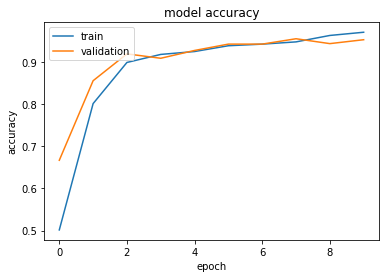

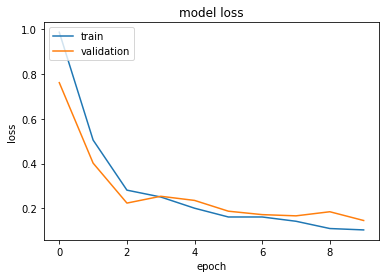

In [33]:
# latih model dengan model.fit 
history = model.fit(
      train_generator,
      steps_per_epoch=41,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=27,
      verbose=2,
      callbacks=callbacks
)

# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



Saving 1UucZqS3qblvU0cH.png to 1UucZqS3qblvU0cH.png
1UucZqS3qblvU0cH.png
rock


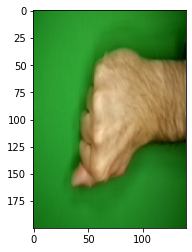

In [36]:

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,140))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  
  output=np.argmax(classes)
  if output==0:
    print('paper')
  elif output==1:
    print('rock')
  elif output==2:
    print("scissors")
  else:
    print("unidentified")
  